<center>Değişken Ölçeklendirme</center>

Özellikle makine öğrenmesi konularında veri önişleme adımlarında kullanılır. Veri kümemizde geniş aralıklı farklı değişkenlerde. Aralık genişliklerinin farklı olması bize bazı sıkıntılar çıkarabilir. Mesela yaş ve gelir miktarı için yaş 0-100 iken gelir 0-15000 gibi rakamlarda olması aralıkların bu kadar fark etmesi modellemesini yaparken bize sıkıntı çıkarabiliyor. Aynı zamanda veri normalizasyonu olarak da geçebilir. 

In [25]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing as pr 
import seaborn as sns

In [6]:
data = pd.read_excel(r"C:\Users\Kemalettin\Desktop\anlasekon\Python ile Veri analizi\dataNormalizing.xlsx")

In [7]:
data.head()

,D1
0,577
1,36
2,919
3,905
4,573


Max - Min aralık ölçeklendirme. Genel olarak verileri 0-1 aralığına ölçekleyen bir sistemdir. Farklı değer de kullanılabilir ama genel olarak 0-1 aralığı kullanılır. 

In [9]:
maxminScale = pr.MinMaxScaler().fit_transform(data)
print(maxminScale)
scaledData = pd.DataFrame(maxminScale)
scaledData.head()

[[0.56295525]
 [0.        ]
 [0.91883455]
 [0.90426639]
 [0.55879292]
 [0.44953174]
 [0.57127992]
 [0.00520291]
 [0.37565036]
 [0.8792924 ]
 [0.90218522]
 [0.11030177]
 [0.48074922]
 [0.94380853]
 [0.11030177]
 [0.48074922]
 [0.94380853]
 [0.68886576]
 [0.38917794]
 [0.20707596]
 [0.00208117]
 [0.01873049]
 [0.69510926]
 [0.74193548]
 [0.65452653]
 [1.        ]
 [0.49115505]
 [0.49531738]
 [0.75754422]
 [0.37669095]]


,0
0,0.562955
1,0.000000
2,0.918835
3,0.904266
4,0.558793


Bu şekilde verilerimizin hepsi 0-1 aralığına indirgenmiş oldu. Burada dönen değer bir array. type(maxminScale) dersek zaten görürüz. Basitçe en küçük değeri 0 yapıyor ve en büyüğü 1 e oranlıyor. 
Bir diğer ölçeklendirme RobustScaler robust ölçeklendirme yani sağlam ölçeklendirme adında anlaşılacağı gibi sağlam çalışır :D yani aykırı değerlerin çok olduğu yerlerde kullanılır. MaxMinScaler aykırı değerlerden çok etkilenirken Robust daha az etkilenir. Uygulaması da aynı şekilde ve array döner. 



In [14]:
robustScale = pr.RobustScaler().fit_transform(data)
robustScale = pd.DataFrame(robustScale)
robustScale.columns=["Robust Scaled Data"]
robustScale.head()

,Robust Scaled Data
0,0.095041
1,-1.395317
2,1.037190
3,0.998623
4,0.084022


Bir de standardazisyon gibi kullanılan yöntem var yaptığı şey z skoru hesaplamak gibi. Kullanımı da yukarıdaki scaler fonksiyonlarla aynı şekilde çalışıyor.

In [24]:
standardScale = pr.StandardScaler().fit_transform(data)
standardScale = pd.DataFrame(standardScale)
allScaledData = pd.DataFrame({
    "Min Max Scaled Data": pr.MinMaxScaler().fit_transform(data).flatten(),
    "Robust Scaled Data": pr.RobustScaler().fit_transform(data).flatten(),
    "Standard Scaled Data": pr.StandardScaler().fit_transform(data).flatten()
})
allScaledData.head()


,Min Max Scaled Data,Robust Scaled Data,Standard Scaled Data
0,0.562955,0.095041,0.125374
1,0.000000,-1.395317,-1.680141
2,0.918835,1.037190,1.266752
3,0.904266,0.998623,1.220029
4,0.558793,0.084022,0.112024


<center>KATEGORİK DEĞİŞKEN KODLAMA </center>
Kategorik değişken cinsiyet gibi bir grubu veya tek bir süreksiz ifadeyi tanımlayan değişkenlere denir mesela 0-10 yaş bu da aslında bir kategorik değişkendir. Çünkü bir grup ifade eder 5 yaş veya 1 yaş veya 9 yaş farketmeksizin burada aynı isimle isimlendirildiği için aslında Kadın gibi yani merve ile ayşe ikisi de cinsiyet olarak tek bir yerde eşit olarak toplanır ve adlandırılır. Tabi bu tarz yapıların hesaplamaya dahil edilebilmesi için bunların birer sayısal değere dönüştürülmesi gerekir. Takdir edilir ki String -> İnteger mantığını her yazılım da hata verir. İşte şimdi burada bu durumu inceleyecek ve bu durumun üstesinden gelmenin yollarını öğreneceğiz. 

In [26]:
data2 = sns.load_dataset("titanic")
data2.head() # görüldüğü üzere burada titanic hazır datasetimiz üzerinden sex sütunu ile ilgileneceğiz. 


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
label = pr.LabelEncoder().fit_transform(data2["sex"])
label.head()  # çıktı da görüldüğü üzere LabelEncoderimiz bizim erkek ve kadın olan cinsiyetlerimizi 0 ve 1 e dönüştürdü fit ve transform etti yani.

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [28]:
veri2 = pd.DataFrame(label)
veri2.head()

,0
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [30]:
data2["labeledSex"] = veri2 # burada orjinal datamıza bu etiketlenmiş verileri yeni bir sütun olarak yerleştirelim
data2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,labeledSex
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


<center>ONE-HOT DÖNÜŞÜMÜ ( ONE-HOT ENCODING)</center>
Şimdi güzel etiketleme işlemini yaptık ve artık bilgisayar bunları işleyebilir. Matematik bunları işleyebilir denklemlerde etki edebilecek birer değişken olarak kullanabilir. Fakat bu nokta sentatik mantığa uygun olsa da genel mantığa uygun olmayan bir problem ortaya çıkıyor. Bu problem şudur ki; bilgisayara Erkek - Kadın 'ı etiketlediğimiz zaman 0-1 veya 1-0 şeklinde bir dönüşüm uyguladı burada sorun yok. Sorun 1 > 0 veya 0 < 1 durumlarında ortaya çıkıyor. Eğer bizim kategorik değişkenimiz araştırma konusunda veya problem özelinde bir hiyerarşik anlam ifade etmiyor ise yani Erkeğin kadına veya kadının erkeğe üstün olup olmaması gibi bir durum yoksa ve bu yok olan durum bizim araştırmamız için önemli değilse. Bu noktada bunu bilgisayara anlatmamız gerekiyor aksi halde bilgisayar 1 > 0 diyerek bu hiyerarşinin de var olduğunu kabul ederek işlemler yapacaktır. Eğer hiyerarşik bir sistematik varsa ve bu önemliyse bu nokta da sıralama ve çevirim doğru yapıldığı sürece bir sorun olmayacaktır. Biz bu nokta da bu durumun olmadığı noktaya odaklanarak ilerleyelim. 

In [31]:
# Cinsiyet Araç rengi ve Eğitim seviyesinden oluşan 3 sütunlu veri kümemizi içeri aktaralım Burada veri kümemizde sadece eğitim sütunu 
# hiyerarşik bir yapıya sahiptir.
data3 = pd.read_excel(r"C:\Users\Kemalettin\Desktop\anlasekon\Python ile Veri analizi\onehotencodDatas.xlsx")
data3.head()

,Cinsiyet,AraçRenk,Eğitim
0,Erkek,Kırmızı,Lise
1,Kadın,Siyah,Doktora
2,Erkek,Beyaz,Üniversite
3,Kadın,Siyah,Doktora
4,Kadın,Kırmızı,Yüksek Lisans


In [36]:
data4 = data3.copy()
data4["KodCinsiyet"] = pr.LabelEncoder().fit_transform(data4["Cinsiyet"])
data4["KodAraçRenk"] = pr.LabelEncoder().fit_transform(data4["AraçRenk"])
data4["KodEğitim"] = pr.LabelEncoder().fit_transform(data4["Eğitim"]) 
data4.head()


,Cinsiyet,AraçRenk,Eğitim,KodCinsiyet,KodAraçRenk,KodEğitim
0,Erkek,Kırmızı,Lise,0,1,1
1,Kadın,Siyah,Doktora,1,3,0
2,Erkek,Beyaz,Üniversite,0,0,3
3,Kadın,Siyah,Doktora,1,3,0
4,Kadın,Kırmızı,Yüksek Lisans,1,1,2


In [35]:
# Temel etiketleme işlemini yaptık hatırlamak için de bir çalışma olmuş oldu. Bizim asıl odağımız burada one hot 
# one hot enc hiyerarşinin olmadığı kategorik değişkenlerin hiyerarşi oluşumlarını engellemek için yapılır demiştik bunu 
# ML algoritmaları için yapıyor ve bunu yaparken kategorileri kategori olmaktan çıkararak bir boolean değer gibi bir bit miş gibi davranıyor 
# yani mesela kadın 1 erkek 0 değilde cinsiyet bir kategoridir. Cinsiyet_Kadın Cinsiyet_Erkek adında 2 farklı sütun oluşturuyor ve bunlara 10 01 
# çiftleri atıyor 
onehotdonusumu = pd.get_dummies(data4,columns=["Cinsiyet","AraçRenk","Eğitim"]) # bunun sonunda dönüşüme uğrayan sütun orjinalden silinir 
# kopyalayarak çalışmanın güzel yanını da bize tekrar göstermiş oluyor. 
onehotdonusumu.head() # buna aynı zamanda kukla değişken de denir. Bu kendi ile beraber bazen Kukla değişken tuzağı dediğimiz bir problem doğurur
# Bir de ona bakalım

,KodCinsiyet,KodAraçRenk,KodEğitim,Cinsiyet_Erkek,Cinsiyet_Kadın,AraçRenk_Beyaz,AraçRenk_Kırmızı,AraçRenk_Mavi,AraçRenk_Siyah,AraçRenk_Yeşil,Eğitim_Doktora,Eğitim_Lise,Eğitim_Yüksek Lisans,Eğitim_Üniversite,Eğitim_İlkokul
0,0,1,1,True,False,False,True,False,False,False,False,True,False,False,False
1,1,3,0,False,True,False,False,False,True,False,True,False,False,False,False
2,0,0,3,True,False,True,False,False,False,False,False,False,False,True,False
3,1,3,0,False,True,False,False,False,True,False,True,False,False,False,False
4,1,1,2,False,True,False,True,False,False,False,False,False,True,False,False


<center><h1> KUKLA DEĞİŞKEN TUZAĞI ( DUMMY VARIABLE TRAP ) </h1><center>

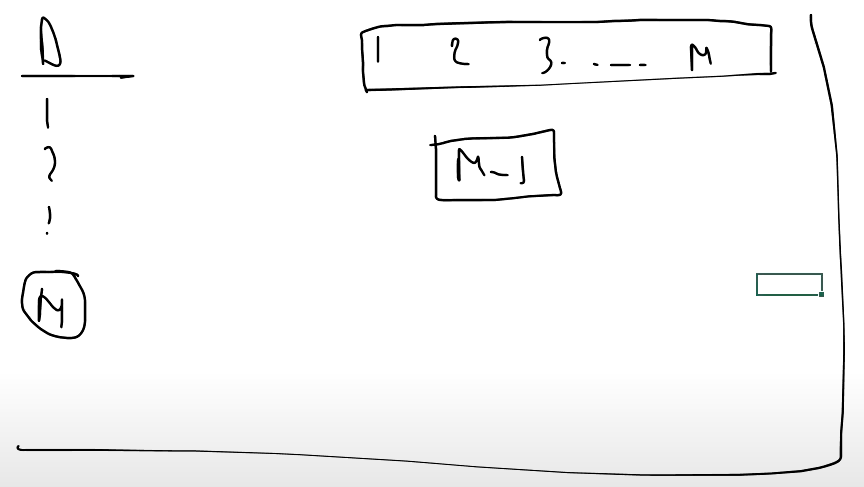

Burada anlatılmak istenilen one hot dönüşümünü uyguladığımız zaman M tane değişken için oluşturulacak değişken sayısı yine M tane olacaktır. Fakat burada tüm bilgileri almak içni M-1 tane değişken yeterli olacaktır bunu bir örnek üzerinden görecek olursak daha iyi anlarız. 


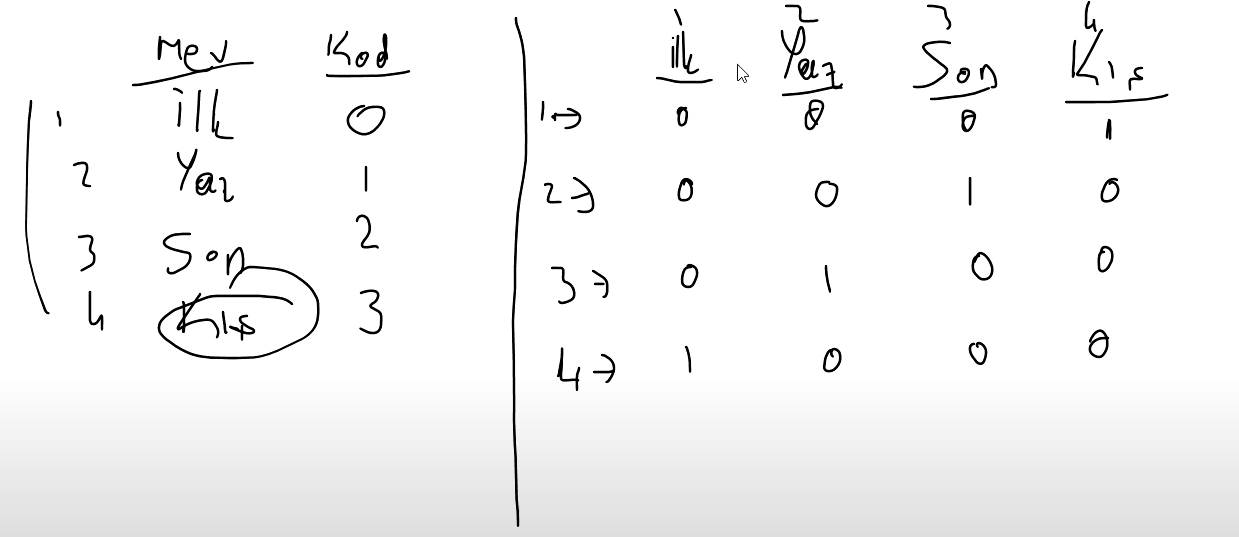

Buradaki gibi eğer mevsimler üzerinden one hot dönüşümü uygularsak boolean değeri olarak bu şekilde saklar ama M-1 i yeterli olur demiştik bunun nedeni şu eğer ben bir kişinin tatil sezonu için bilgi alıyor olsaydım ve kişinin İlkbahar, Yaz, Sonbahar da tatile gitmediğini biliyorsam bu kişi hangi mevsimde tatile gidiyor olabilir. Tabi ki geriye kalan ve tek mevsim olan Kış mevsiminde tatile gittiğini anlarım işte bu nokta da eğer ben one hot dönüşümünden sonra M tane kukla değişkenini kullanırsam burada kukla değişken tuzağı dediğimiz tuzağa, soruna yakalanmış olurum bunu çoklu doğrusallık sorunu olarak adlandırılan çalışmalarda görürüz.

In [38]:
data5 = data3.copy()
data5["KodCinsiyet"] = pr.LabelEncoder().fit_transform(data5["Cinsiyet"])
data5["KodAraçRenk"] = pr.LabelEncoder().fit_transform(data5["AraçRenk"])
data5["KodEğitim"] = pr.LabelEncoder().fit_transform(data5["Eğitim"]) 
onehotdonusumu2 = pd.get_dummies(data5,columns=["Cinsiyet","AraçRenk","Eğitim"],drop_first=True)
onehotdonusumu2.head()
# burada sonuçlara bakacak olursak 5 renk varken 1 ini silmiş. Veya cinsiyet te sadece kadın kalmış yani kadın ise kadındır değil ise erkektir 
# zaten bu şekilde M-1 bilgi ile M i de öğrenmiş oluyoruz.

,KodCinsiyet,KodAraçRenk,KodEğitim,Cinsiyet_Kadın,AraçRenk_Kırmızı,AraçRenk_Mavi,AraçRenk_Siyah,AraçRenk_Yeşil,Eğitim_Lise,Eğitim_Yüksek Lisans,Eğitim_Üniversite,Eğitim_İlkokul
0,0,1,1,False,True,False,False,False,True,False,False,False
1,1,3,0,True,False,False,True,False,False,False,False,False
2,0,0,3,False,False,False,False,False,False,False,True,False
3,1,3,0,True,False,False,True,False,False,False,False,False
4,1,1,2,True,True,False,False,False,False,True,False,False


<center><h1> ORDİNAL DEĞİŞKEN DÖNÜŞÜMÜ ( ORDINAL ENCODING ) </h1><center>

Şimdiye kadar hiyerarşik yapının olmadığı kategorik değişkenleri gördük. Peki hiyerarşi olursa nasıl olur yani yukarıdaki kümede eğitim seviyesi ile ilgili mesela eğitim düzeyi arttıkça sigara içme düzeyi de artıyor neden hayattaki baskı artıyor vs. insanlar tuzağa düşüyor mesela. 

In [51]:
data5[["Eğitim","KodEğitim"]].head() # Öncelikle nasıl bir etiketleme olduğunu görmek için yazdırdığımızda aşağıdaki
# gibi bir tablo karşımıza çıkmakta görüldüğü üzere rastgele olacak şekilde bir etiketleme kullanılmış yani doktora 0 iken lise 1 mesela 
# bunları düzgün bir şekilde yapmamız lazım bunu nasıl yapacağız. 

,Eğitim,KodEğitim
0,Lise,1
1,Doktora,0
2,Üniversite,3
3,Doktora,0
4,Yüksek Lisans,2


In [50]:
sıralı = pd.Categorical(data5["Eğitim"],categories=["İlkOkul","Lise","Üniversite","Yüksek Lisans","Doktora",],ordered=True)
data5["SıralıEğitim"],sıra=pd.factorize(sıralı,sort=True)
print(sıra) # sıralamamızı bu şekilde oluşturmuş
print(data5[["Eğitim","KodEğitim","SıralıEğitim"]])
# Bu kadar basit Scaling yani ölçekleme tarafını tamamen bitirmiş olduk. 


['Lise', 'Üniversite', 'Yüksek Lisans', 'Doktora']
Categories (5, object): ['İlkOkul' < 'Lise' < 'Üniversite' < 'Yüksek Lisans' < 'Doktora']
           Eğitim  KodEğitim  SıralıEğitim
0            Lise          1             0
1         Doktora          0             3
2      Üniversite          3             1
3         Doktora          0             3
4   Yüksek Lisans          2             2
5      Üniversite          3             1
6         İlkokul          4            -1
7      Üniversite          3             1
8         İlkokul          4            -1
9      Üniversite          3             1
10           Lise          1             0
11        Doktora          0             3
12     Üniversite          3             1
13        İlkokul          4            -1
14        İlkokul          4            -1
15           Lise          1             0
16     Üniversite          3             1
17           Lise          1             0
18  Yüksek Lisans          2             2